# Introduction

This report consists analysis of Data pertaining to US Gross Rent Records for different geographic and track locations. This will be used to get further insight on prime locations compare to non prime locations thus helping in investment decisions for real estate as well as business investments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
%matplotlib inline

In the code above we have imported all the necessary modules to make our calculations easier as well as to provide a clear visual of the analysis we are going to do.

# Discription of dataset

**Original Owner:**  Golden Oak Research Group

**Source:** https://www.kaggle.com/goldenoakresearch/acs-gross-rent-us-statistics/version/3

### Dataset Information: 

The database contains +40,000 records on US Gross Rent & Geo Locations. This was originally sampled from US cencus Bureau. There are two kinds of information: One pertaining to US geographic locations and the other involving rental information as we can see below

#### Geographic Locations:

#### Gross Rent Statistics:

In [2]:
data = pd.read_csv("kaggle_gross_rent.csv", encoding="latin1", low_memory=False)

We have loaded the data to work on it.

In [3]:
data.head(5)

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
0,101901,1,Alabama,AL,Chambers County,Wadley,Abanda,CDP,place,36276,256,7764034,34284,33.091627,-85.527029,972,968,51,12
1,101904,1,Alabama,AL,Winston County,Addison,Addison,Town,place,35540,256,9753292,83417,34.202681,-87.178004,519,460,275,64
2,101907,1,Alabama,AL,Marshall County,Albertville,Albertville city,City,place,35950,256,68731806,258708,34.263130,-86.210660,625,585,234,2560
3,101910,1,Alabama,AL,Pickens County,Aliceville,Aliceville city,City,place,35442,205,11819855,0,33.123686,-88.159364,546,438,354,574
4,101913,1,Alabama,AL,Etowah County,Walnut Grove,Altoona,Town,place,35990,205,11193369,25442,34.039204,-86.305697,350,303,185,114


Above, we can see sample of 10 records from our dataset. One can also observe that our data comprises of numerical as well as text values.

#### Column value description:

In [4]:
data.describe()

,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,Samples
count,4.042400e+04,40424.000000,40424.000000,4.042400e+04,4.042400e+04,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000,40424.000000
mean,5.344030e+07,28.328443,50047.200920,9.885934e+07,5.875433e+06,37.804154,-91.238662,945.879329,915.471329,311.845809,492.120547
std,1.018385e+08,16.510581,28607.579157,1.146564e+09,1.878089e+08,5.631173,15.896897,490.304785,504.722172,222.433989,5850.489814
min,1.021000e+03,1.000000,601.000000,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
25%,5.601258e+06,13.000000,28001.000000,1.985499e+06,0.000000e+00,33.997153,-97.387905,657.000000,624.000000,185.000000,52.000000
50%,2.602476e+07,28.000000,48117.500000,5.184370e+06,2.408150e+04,38.914010,-87.457253,857.000000,819.000000,277.000000,146.000000
75%,4.702199e+07,42.000000,75225.500000,2.610209e+07,4.337748e+05,41.515912,-80.144263,1166.000000,1132.000000,396.000000,358.000000
max,4.802211e+08,72.000000,99950.000000,9.163267e+10,2.453228e+10,70.217102,173.256076,4153.000000,4202.000000,3217.000000,828824.000000


## Significant Data

This dataset reflects the rent for different states in USA. We are going to visualize how data looks depending on various attributes and draw some basic observations.

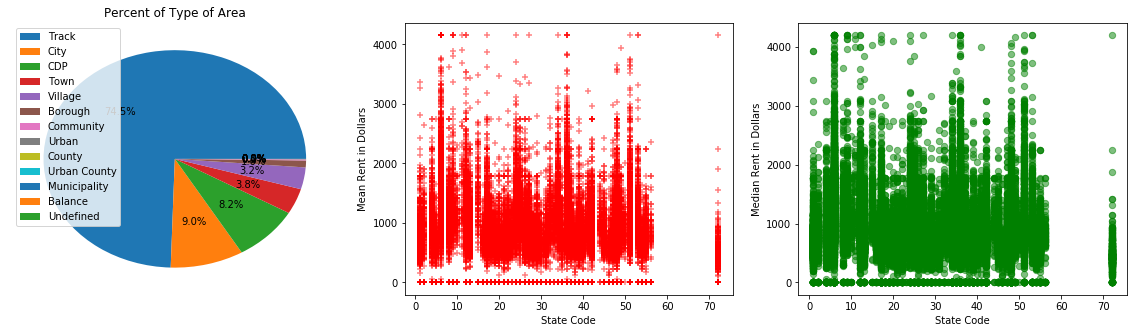

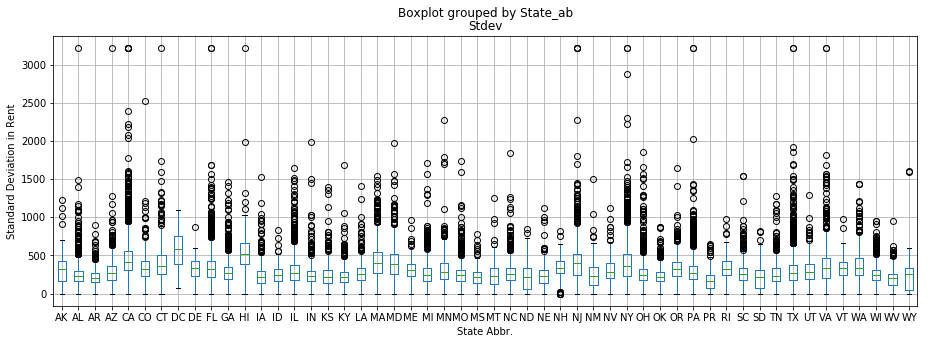

In [5]:

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.pie(data.Type.value_counts(), autopct='%1.1f%%')
plt.legend(data.Type.value_counts().index, loc ='best')
plt.title('Percent of Type of Area')

plt.subplot(1,3,2)
plt.scatter(data.State_Code, data.Mean, s=40, c='r', marker= '+', norm=True, alpha = 0.5)
plt.xlabel('State Code')
plt.ylabel('Mean Rent in Dollars')

plt.subplot(1,3,3)
plt.scatter(data.State_Code, data.Median, s=40, c='g', marker= 'o', norm=True, alpha = 0.5)
plt.xlabel('State Code')
plt.ylabel('Median Rent in Dollars')

data[['State_ab', 'Stdev']].boxplot(by='State_ab', figsize=(15,5))
plt.xlabel('State Abbr.')
plt.ylabel('Standard Deviation in Rent')
plt.show()


## Distribution of the rent rates

Let us try to now visualize how our rent rate distributions are across the 52 states. 

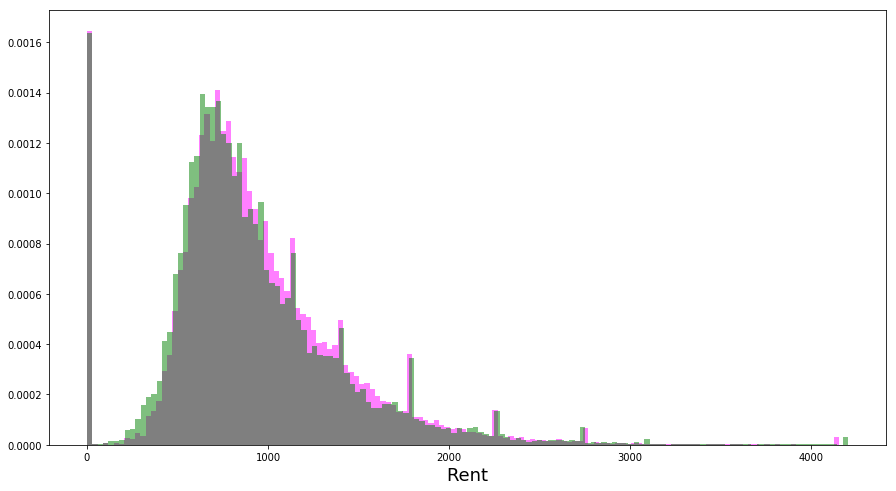

In [6]:
plt.figure(figsize=(15, 8))
plt.hist(data.Mean, density = True, color="magenta", bins='auto', alpha=.5) 
plt.xlabel("Rent",fontsize=18)
plt.hist(data.Median, density = True, color="green", bins='auto', alpha=.5)
plt.show()

## Understanding our data

**Question : Why are prices in Alabama, Arizona, California, Connecticut, Florida, Hawaii, New Jersey, New york, Pennsylvania, Texas and Virgina states high compared to all other states** 

To answer this question let us see what kind of area (whether land or water body) are these states made up of.

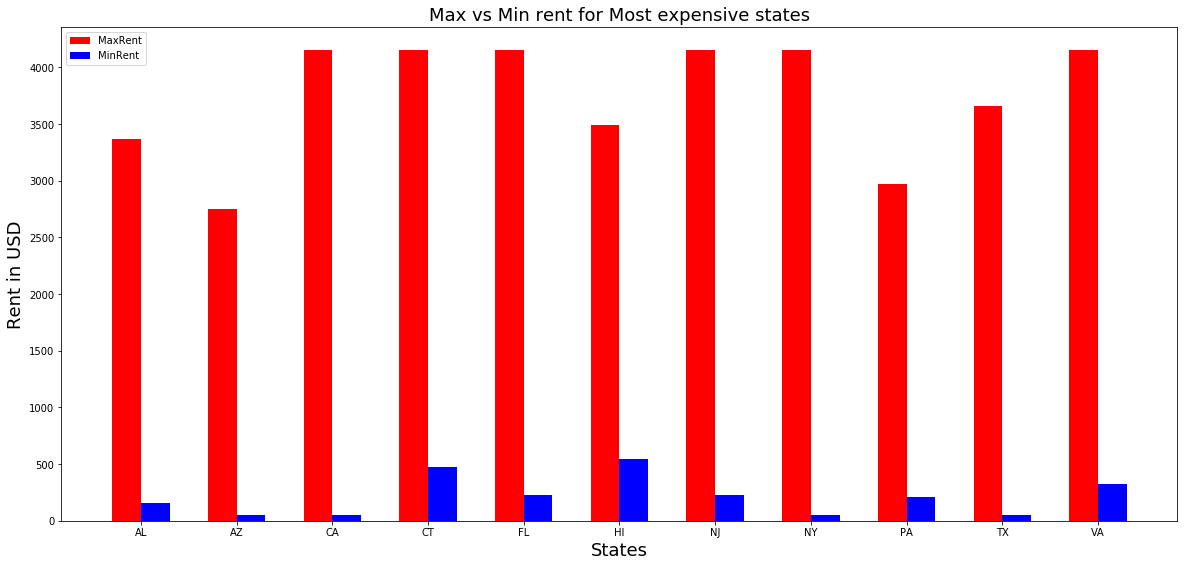

Mean
State_ab Type              
AL       CDP           1579
         City          1412
         Town           996
         Track         3365
AZ       CDP           1566
         City          1475
         Town          1409
         Track         2752
CA       CDP           3549
         City          3166
         Town          3086
         Track         4153
CT       Borough       2034
         CDP           2575
         City          1480
         Track         4153
FL       CDP           2081
         City          2323
         Town          2133
         Track         4153
         Village       2500
HI       CDP           2492
         Track         3489
NJ       Borough       3164
         CDP           2609
         City          1673
         Town          1665
         Track         4153
         Undefined     1600
NY       CDP           2826
         City          1692
         Track         4153
         Village       3846
PA       Borough       1733
         CDP           2749
         City           999
         Municipality   925
         Town           898
         Track         2969
TX       CDP           2405
         City          3657
         Town          2749
         Track         3590
         Village       2177
VA       CDP           3632
         City          1720
         Town          1902
         Track         4153

In [43]:
plt.figure(figsize=(20, 20))

x = data[data.State_ab.isin(["AL","AZ","CA","CT","FL","HI","NJ","NY","PA","TX","VA"]) ]
xdata = x.drop(x[x.Mean == 0].index)

plt.subplot(2,1,1)
maxrent = xdata.groupby('State_ab').Mean.max()
minrent = xdata.groupby('State_ab').Mean.min()
maxrent = maxrent.to_frame()
minrent = minrent.to_frame()
ind = np.arange(len(maxrent))
width = 0.30       

plt.bar(ind, maxrent.Mean, width, label='MaxRent', color ='r')
plt.bar(ind + width, minrent.Mean, width, label='MinRent', color = 'b')
plt.ylabel('Rent in USD',fontsize = 18)
plt.xlabel('States',fontsize = 18)
plt.title('Max vs Min rent for Most expensive states',fontsize = 18)
plt.xticks(ind + width / 2, minrent.index)
plt.legend(loc='best')

#plt.subplot(2,1,2)


plt.show()

maxrenttype = xdata.groupby(['State_ab','Type']).Mean.max()
minrenttype = xdata.groupby(['State_ab','Type']).Mean.min()
maxrenttype = maxrenttype.to_frame()
minrenttype = minrenttype.to_frame()
maxrenttype
